In [1]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [3]:
len(iris.data)

150

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
len(iris.target)

150

In [6]:
# モデルを作成
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

In [7]:
predicted = clf.predict(iris.data)

In [8]:
sum(predicted == iris.target) / len(iris.target)

0.97333333333333338

In [9]:
tree.export_graphviz(clf, out_file="tree.dot",
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True)

In [10]:
# 作成した決定木を可視化 (pydotplus パッケージを利用)
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

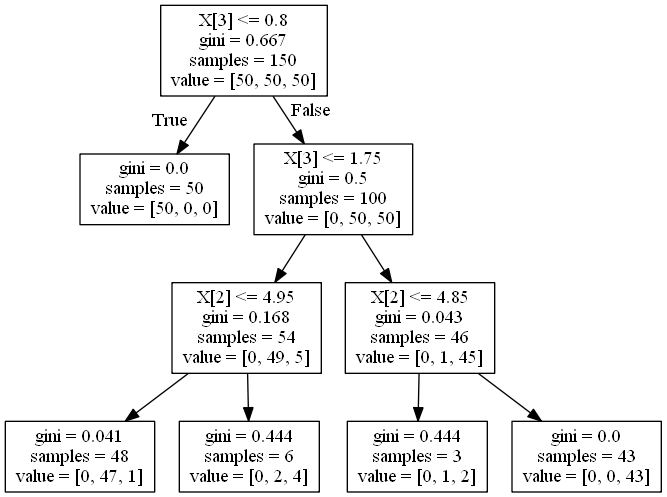

In [11]:
from IPython.display import Image
Image(graph.create_png())

In [12]:
clf.tree_.feature, clf.tree_.children_left, clf.tree_.children_right

(array([ 3, -2,  3,  2, -2, -2,  2, -2, -2], dtype=int64),
 array([ 1, -1,  3,  4, -1, -1,  7, -1, -1], dtype=int64),
 array([ 2, -1,  6,  5, -1, -1,  8, -1, -1], dtype=int64))

In [13]:
def getTreeElement(estimator, isPrint=False):

    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    depth_element = dict()
    for i in range(max(node_depth)):
        depth_element[i] = []
    if isPrint:
        print("The binary tree structure has %s nodes and has "
              "the following tree structure:"
      % n_nodes)

    for i in range(n_nodes):
        if is_leaves[i]:
            if isPrint:
                print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            depth_element[node_depth[i]].append(feature[i])
            if isPrint:
                #print(depth_index)
                print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                      "node %s."
                      % (node_depth[i] * "\t",
                         i,
                         children_left[i],
                         feature[i],
                         threshold[i],
                         children_right[i],
                         ))
    return [v for k,v in depth_element.items()]

In [17]:
from sklearn.externals import joblib
joblib.dump(clf, 'model.pkl')
clf = joblib.load('model.pkl')

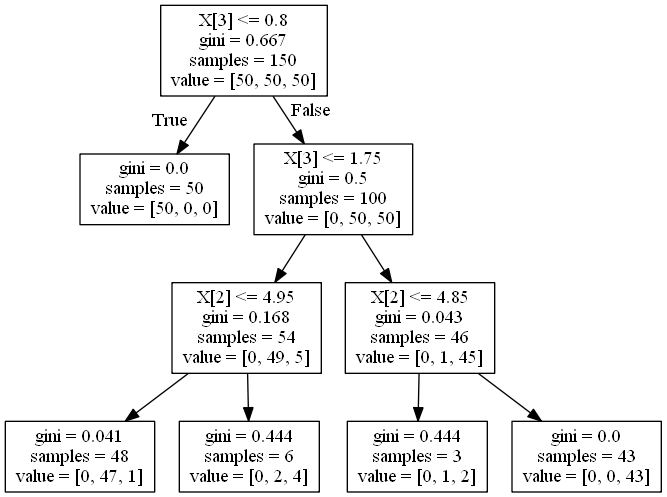

In [18]:
# 作成した決定木を可視化 (pydotplus パッケージを利用)
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())